In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
df = pd.read_csv('Database.csv')
df.head()

,Unnamed: 0,Time,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
0,0,2019-01-01-T00:00,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2810,22216
1,1,2019-01-01-T00:05,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2862,22106
2,2,2019-01-01-T00:10,1,1,0.0,0.0,0.0,2.88,56.194,1.78,0,2916,22130
3,3,2019-01-01-T00:15,1,1,0.0,0.0,0.0,2.88,56.344,1.74,0,2920,22040
4,4,2019-01-01-T00:20,1,1,0.0,0.0,0.0,2.84,56.440,1.72,0,2902,21963


In [3]:
# droping redundant index column
df = df.drop(columns = ['Unnamed: 0'])

# checking the datatypes of the columns
print(df.info())

# converting the datatype of time column to datatime
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index("Time")
# extracting attributes from Time attribute
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Date'] = df.index.date

# Combining the energy generated by both sources
df['Energy_produced'] = df['PV_production'] + df['Wind_production']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315648 entries, 0 to 315647
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             315648 non-null  object 
 1   Season           315648 non-null  int64  
 2   Day_of_the_week  315648 non-null  int64  
 3   DHI              315648 non-null  float64
 4   DNI              315648 non-null  float64
 5   GHI              315648 non-null  float64
 6   Wind_speed       315648 non-null  float64
 7   Humidity         315648 non-null  float64
 8   Temperature      315648 non-null  float64
 9   PV_production    315648 non-null  int64  
 10  Wind_production  315648 non-null  int64  
 11  Electric_demand  315648 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 28.9+ MB
None


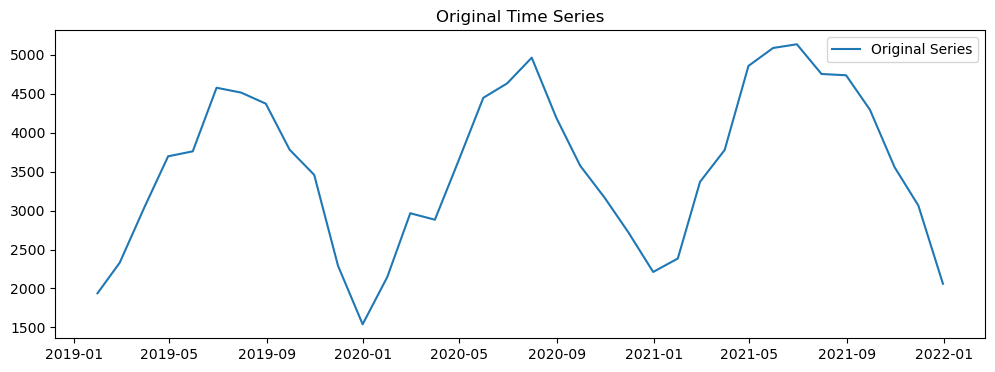

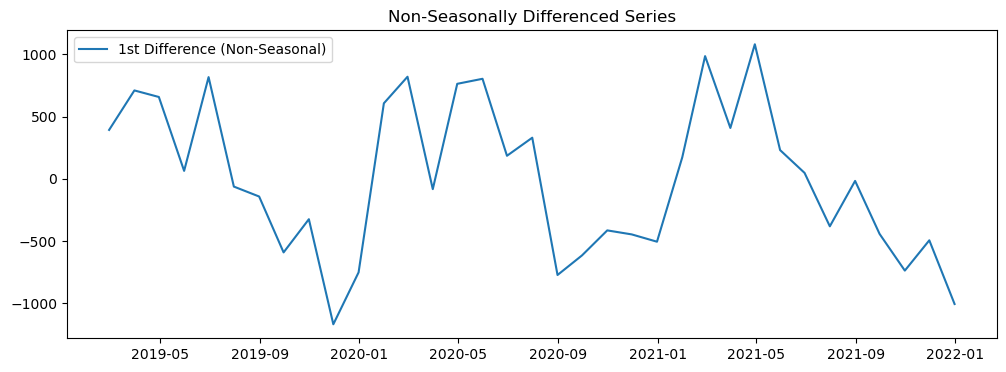

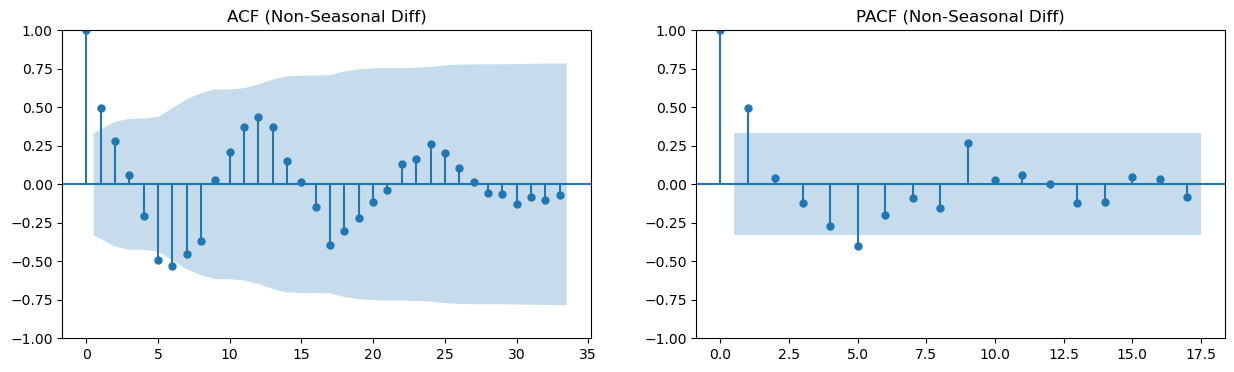

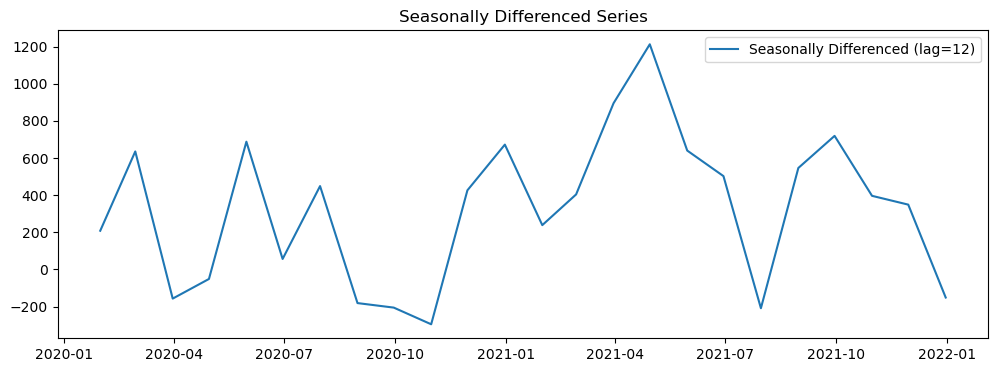

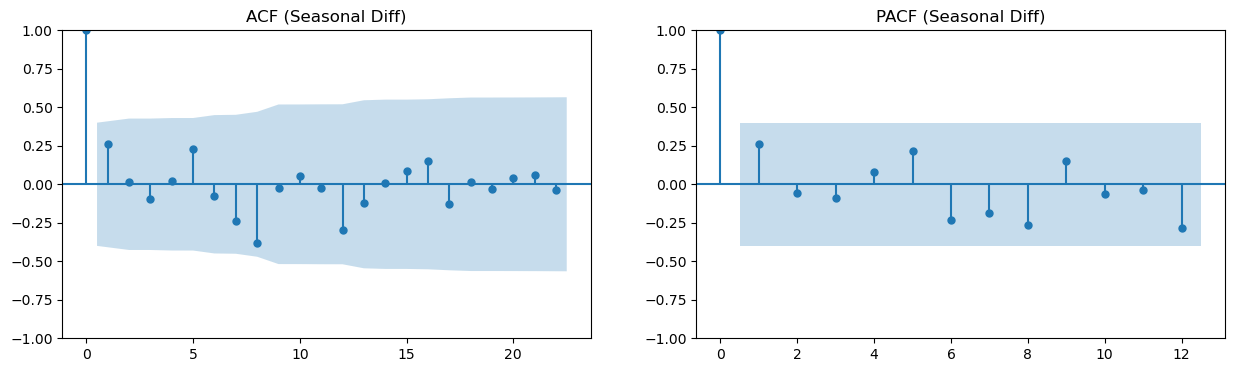

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def identifying_params(ts):

    # Assuming your series is a pandas Series called `ts`
    # ts = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)['column_name']

    # 1. Plot original series
    plt.figure(figsize=(12, 4))
    plt.plot(ts, label='Original Series')
    plt.title('Original Time Series')
    plt.legend()
    plt.show()

    # 2. Non-seasonal differencing (d=1 by default)
    ts_diff = ts.diff().dropna()

    plt.figure(figsize=(12, 4))
    plt.plot(ts_diff, label='1st Difference (Non-Seasonal)')
    plt.title('Non-Seasonally Differenced Series')
    plt.legend()
    plt.show()

    # 3. ACF and PACF for non-seasonal differenced series
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    plot_acf(ts_diff, ax=axes[0], lags=ts_diff.shape[0]-2)
    plot_pacf(ts_diff, ax=axes[1], lags=ts_diff.shape[0]//2)
    axes[0].set_title('ACF (Non-Seasonal Diff)')
    axes[1].set_title('PACF (Non-Seasonal Diff)')
    plt.show()

    # 4. Seasonal differencing (D=1, seasonal period=s)
    s = 12  # replace with your seasonal period
    ts_seasonal_diff = ts.diff(s).dropna()

    plt.figure(figsize=(12, 4))
    plt.plot(ts_seasonal_diff, label=f'Seasonally Differenced (lag={s})')
    plt.title('Seasonally Differenced Series')
    plt.legend()
    plt.show()

    # 5. ACF and PACF for seasonally differenced series
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    plot_acf(ts_seasonal_diff, ax=axes[0], lags=ts_seasonal_diff.shape[0]-2)
    plot_pacf(ts_seasonal_diff, ax=axes[1], lags=ts_seasonal_diff.shape[0]//2)
    axes[0].set_title('ACF (Seasonal Diff)')
    axes[1].set_title('PACF (Seasonal Diff)')
    plt.show()

identifying_params(df['PV_production'].resample('M').mean())


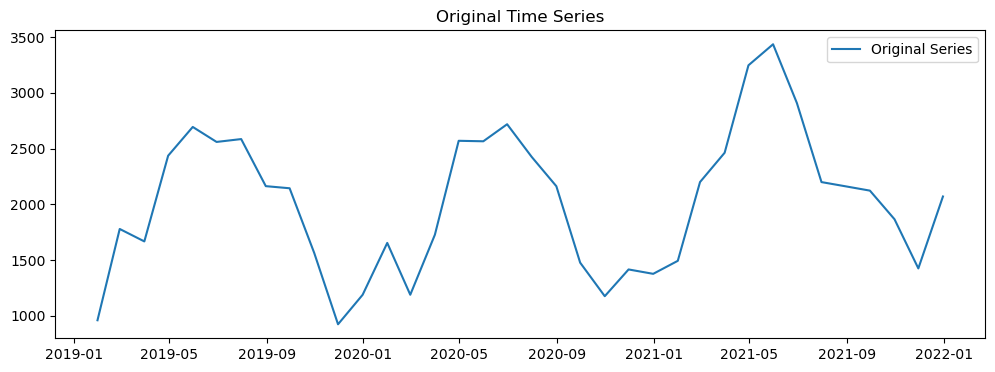

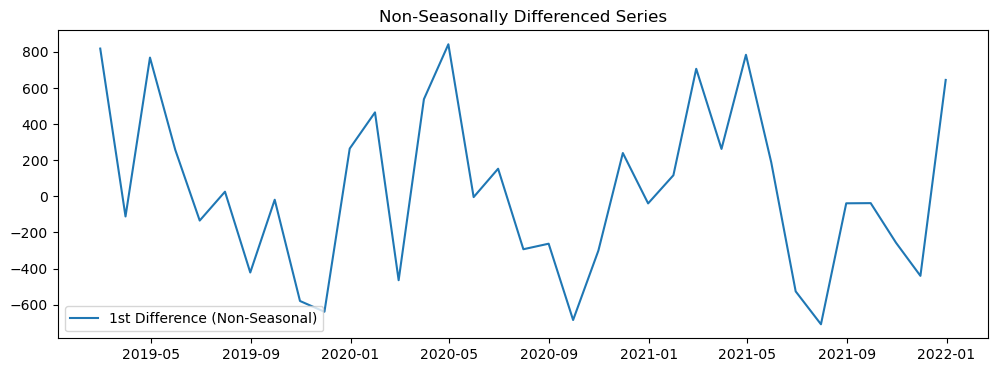

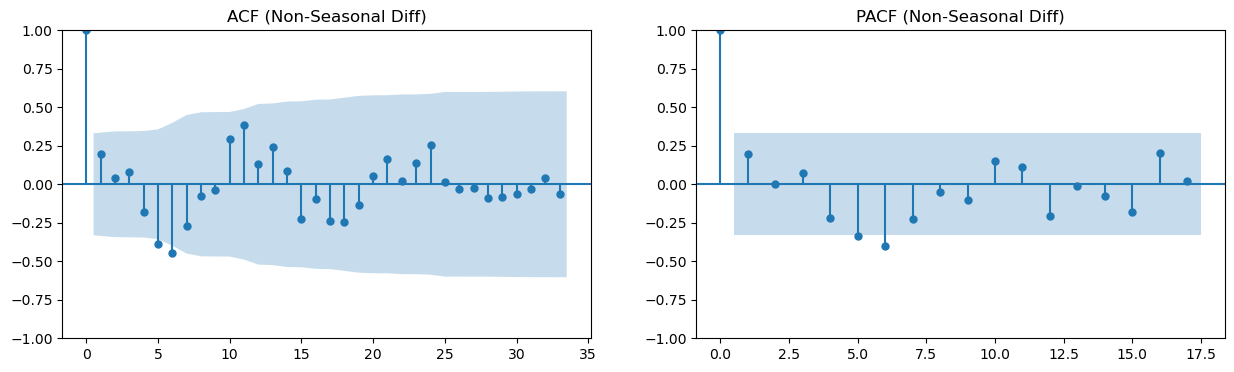

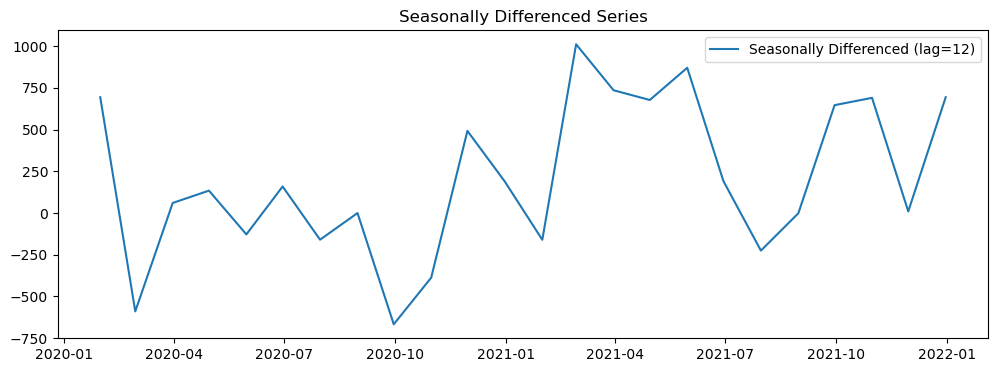

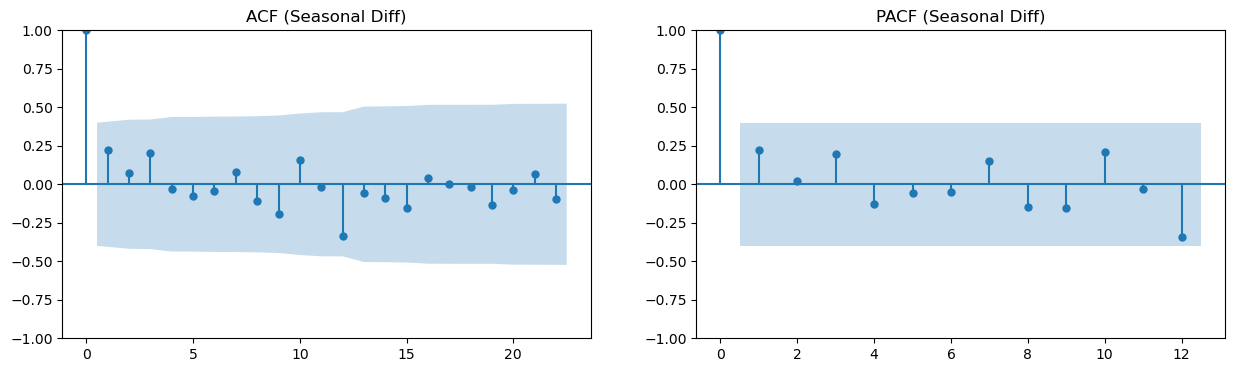

In [5]:
identifying_params(df['Wind_production'].resample('M').mean())

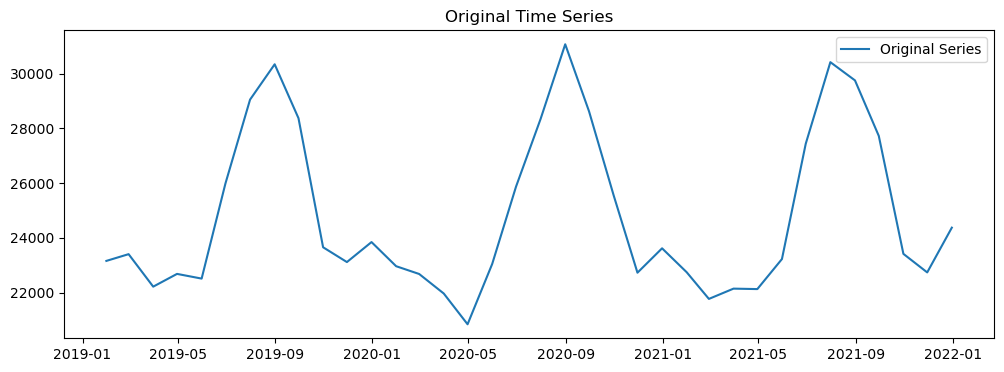

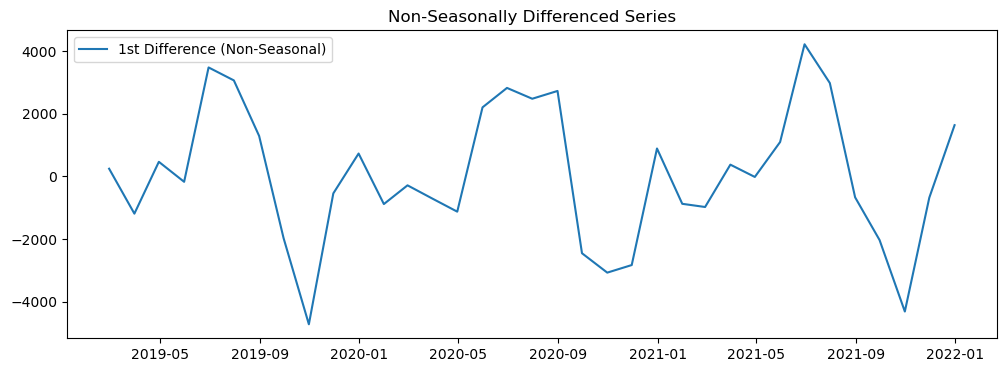

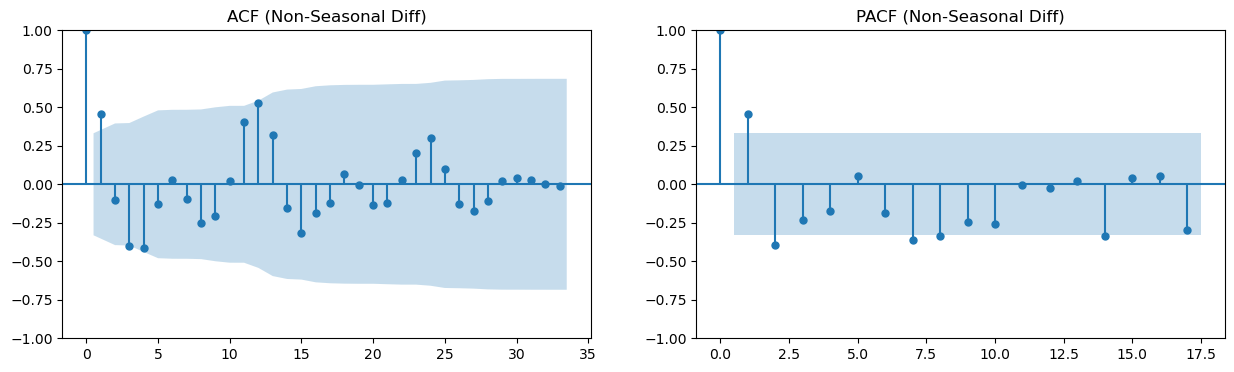

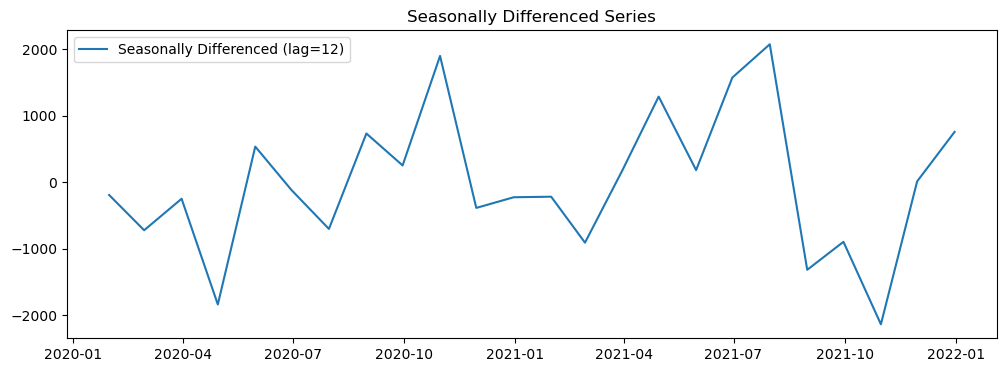

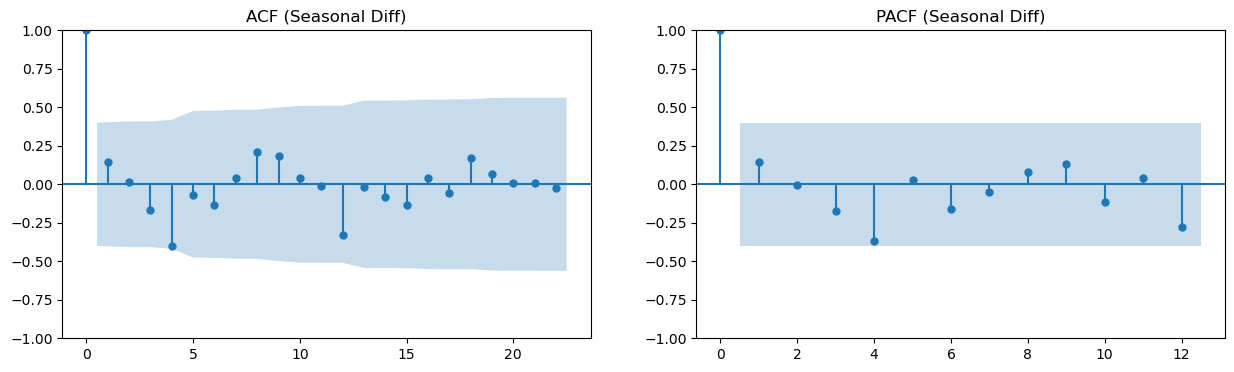

In [6]:
identifying_params(df['Electric_demand'].resample('M').mean())